In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from deep_image_prior_layers import *
from deep_image_prior_loss import *

%matplotlib inline

c:\users\gbk2004\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\gbk2004\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\gbk2004\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\gbk2

In [2]:
gpu_id = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = gpu_id
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)     
config = tf.ConfigProto(gpu_options=gpu_options)
config.gpu_options.allow_growth = True

In [ ]:
# image_path = r'E:\datasets\kate.png'
# mask_path = r'E:\datasets\kate_mask.png'

In [ ]:
# image_path = r'E:\datasets\library.png'
# mask_path = r'E:\datasets\library_mask.png'

In [3]:
imsize = -1

In [4]:
flash_path = r'E:\datasets\cave01_00_flash.jpg'
no_flash_path = r'E:\datasets\cave01_01_noflash.jpg'

In [5]:
imgs = load_LR_HR_imgs_sr(flash_path, -1, 1, enforse_div32='CROP')
img_flash = imgs['HR_pil']
img_flash_np = pil_to_np(img_flash)

img_no_flash = load_LR_HR_imgs_sr(no_flash_path, -1, 1, enforse_div32='CROP')['HR_pil']
img_no_flash_np = pil_to_np(img_no_flash)

HR and LR resolutions: (768, 704), (768, 704)
HR and LR resolutions: (768, 704), (768, 704)


In [6]:
plot_iter = 50
num_iter = 601

In [7]:
img_no_flash_np.shape

(3, 704, 768)

In [8]:
net_input = img_no_flash_np.transpose((1,2,0))[None,...]

In [9]:
net_input.shape

(1, 704, 768, 3)

In [10]:
input_depth = net_input.shape[-1]
num_iter = 601
reg_noise_std = 0.0
factor = 6

In [11]:
inputs = tf.placeholder(tf.float32,[None,net_input.shape[1],net_input.shape[2],input_depth],name='inputs')

In [12]:
out = skip_net(inputs, input_depth, 
           num_channels_down = [128] * 5,
           num_channels_up =   [128] * 5,
           num_channels_skip =    [4] * 5,             
           upsample_mode=['nearest', 'nearest', 'bilinear', 'bilinear', 'bilinear'], filter_skip_size=1,
           need_sigmoid=True, need_bias=True, pad_mode='reflect', act_fn_type='leaky_relu')

W0914 18:58:58.528245  5524 deprecation_wrapper.py:119] From C:\Users\gbk2004\deep_image_prior_layers.py:192: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0914 18:59:00.097689  5524 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [13]:
loss = all_losses['mse'](labels=net_input,predictions=out)

W0914 18:59:08.724033  5524 deprecation.py:323] From c:\users\gbk2004\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\ops\losses\losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate)

In [15]:
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

In [16]:
with tf.control_dependencies(update_ops):     
    train_op = optimizer.minimize(loss)

In [17]:
init_op = tf.global_variables_initializer()

0.13581824


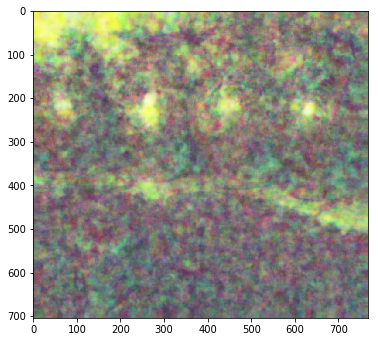

0.114306584
0.096646935
0.07906379
0.06535391
0.055386316
0.048666082
0.042890072
0.03917258
0.03570146
0.032880113
0.030256828
0.028031869
0.026073495
0.024229286
0.022473993
0.020960066
0.019605666
0.018321203
0.017141027
0.016091648
0.015081636
0.014181779
0.013328521
0.012513376
0.01175488
0.011048449
0.010367791
0.009770855
0.0091989115
0.008690022
0.008198432
0.007739423
0.0073263035
0.006938121
0.0065718377
0.006233007
0.005913896
0.005596117
0.005315735
0.0050541507
0.004853767
0.004640203
0.004421783
0.0041993586
0.0040171766
0.0038601672
0.0037101898
0.0035474238
0.003396088
0.0032794776


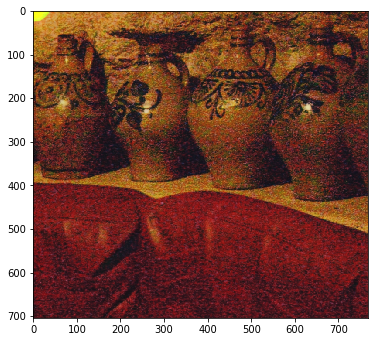

0.0031597205
0.0030261553
0.0028993487
0.002765386
0.0027279556
0.002661621
0.0025987555
0.0025284004
0.0026028643
0.002466844
0.0023563574
0.0022369514
0.0022854873
0.0021935657
0.0020413792
0.0020265977
0.0019209671
0.0018611961
0.0018567293
0.0017477601
0.001696403
0.0016662002
0.0016191801
0.001553802
0.0015498712
0.001477154
0.0014630842
0.0014199975
0.0013753942
0.0013447573
0.0013164476
0.0012710588
0.0012611699
0.0012122835
0.0011936364
0.0011612482
0.0011318142
0.0011152364
0.001086208
0.0010613791
0.0010451069
0.0010202487
0.0010060043
0.0009824892
0.00096420257
0.0009448668
0.00092696655
0.0009104476
0.0008948181
0.00088033744


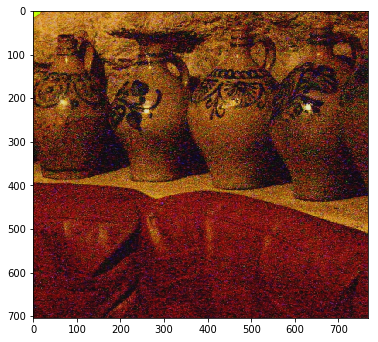

0.0008657978
0.00085186656
0.0008380933
0.00082349963
0.0008080692
0.00079466205
0.0007832346
0.0007700552
0.00075831887
0.000748094
0.0007356917
0.00072499085
0.0007174251
0.00070463214
0.0006961981
0.00068843924
0.0006790198
0.0006714093
0.00066120905
0.0006514048
0.00064292934
0.0006339812
0.0006242255
0.0006159022
0.00060664944
0.0005991412
0.00059119257
0.0005827702
0.0005749749
0.00056730415
0.00056031137
0.0005533116
0.000545882
0.0005389428
0.0005341728
0.00053970184
0.00052913534
0.0005277496
0.00052815146
0.00052214356
0.00051750476
0.0005074196
0.0005011908
0.00049219903
0.00048778308
0.00047982385
0.00047749517
0.00047457835
0.00048060584
0.00049099093


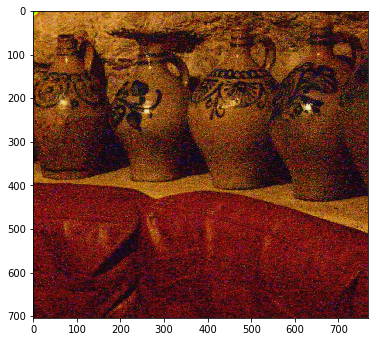

0.00051641394
0.00050214335
0.0004673189
0.0004457153
0.00045043242
0.00046202567
0.0004538142
0.00043008325
0.0004272074
0.00043131394
0.00042956186
0.0004123678
0.00040353587
0.00041013755
0.0004072724
0.00039689342
0.00038769882
0.00038880165
0.00039082268
0.00038175203
0.00037182763
0.00036975436
0.00037021283
0.00036834757
0.00035930827
0.00035416035
0.00035283985
0.00035185055
0.00034793039
0.00034166768
0.0003382199
0.00033558547
0.00033523285
0.0003341976
0.00033082804
0.00032652236
0.0003222592
0.00031948762
0.0003171256
0.0003140178
0.00031105016
0.00030865197
0.0003074237
0.00030801265
0.00030920684
0.0003121301
0.00031491907
0.00031820123
0.00031818458
0.00031180974


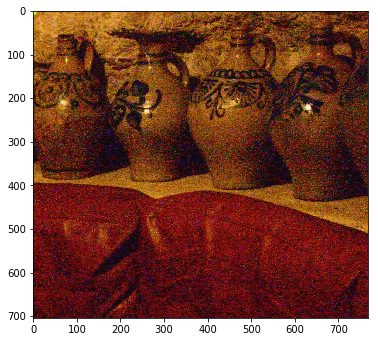

0.00030092662
0.00029003978
0.00028633824
0.0002895556
0.000293189
0.00029076473
0.00028211751
0.00027438786
0.00027270906
0.00027498207
0.0002777898
0.00027829295
0.0002724823
0.0002663553
0.0002613566
0.0002593293
0.00025954956
0.00025993353
0.0002582432
0.00025716936
0.00026714138
0.0002596003
0.00026756802
0.00026234848
0.00025802403
0.00025941434
0.00026045792
0.0002650115
0.0002995782
0.00044092553
0.00069292274
0.0007364591
0.00033616263
0.0006416252
0.0005685558
0.0004744793
0.00050006644
0.00042502093
0.0004355543
0.00044436147
0.00036003775
0.00038987014
0.00037489392
0.00033863672
0.00035384795
0.00032170117
0.00031803595
0.0003150668
0.000285662
0.00030025112


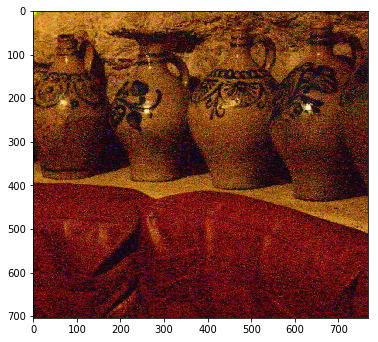

0.00027530998
0.00028818974
0.00025814216
0.00026807192
0.00025150014
0.0002553735
0.00024863277
0.00024252667
0.0002411428
0.00023587693
0.00023555126
0.00023125272
0.00022901395
0.0002239356
0.00021958152
0.00021918358
0.00021490114
0.00021516655
0.00021192168
0.000209769
0.00020720655
0.0002054791
0.00020338056
0.00020213636
0.00020051452
0.00019861148
0.00019770539
0.00019589986
0.00019481112
0.00019325381
0.00019138827
0.00019019419
0.00018904578
0.00018756265
0.00018663151
0.0001851086
0.00018401738
0.00018295267
0.00018134783
0.00018057496
0.00017937305
0.00017830935
0.00017727347
0.00017649129
0.00017546094
0.00017457473
0.0001736347
0.00017258829
0.0001717134
0.00017080338


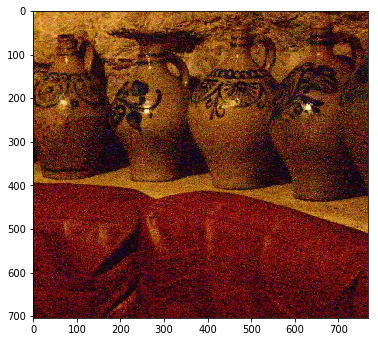

0.00016996349
0.00016901027
0.00016827208
0.00016740448
0.00016662043
0.00016580524
0.00016497307
0.00016421838
0.00016347108
0.00016284028
0.00016284896
0.00016186951
0.00016241573
0.0001637811
0.00016292577
0.00016299817
0.00016047209
0.0001604365
0.0001589311
0.00015918384
0.0001579814
0.00015751085
0.00015633368
0.00015557841
0.00015488979
0.00015399387
0.0001538246
0.00015289245
0.00015249515
0.00015202713
0.00015140047
0.00015181392
0.0001511104
0.00015178305
0.00015186424
0.00015279335
0.00015186197
0.00015242145
0.00015006939
0.00014864947
0.00014676571
0.00014543273
0.00014499653
0.00014458272
0.00014585165
0.00014657869
0.00014811342
0.00014916816
0.00015266864
0.00015509927


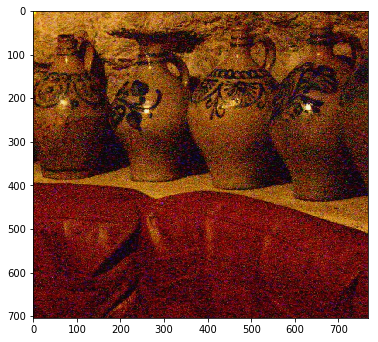

0.00015608661
0.00014913981
0.0001455697
0.00014357587
0.00014348504
0.00014679236
0.0001466605
0.00014858732
0.00014469406
0.0001413805
0.00013850773
0.00013793919
0.00014048052
0.00014135179
0.00014378903
0.00014149115
0.00013884906
0.00013527262
0.00013319835
0.00013345339
0.00013351269
0.0001346248
0.00013577302
0.00013725352
0.00013628684
0.00013660314
0.00013524959
0.00013532124
0.00013290852
0.00013150866
0.00012904998
0.00012834909
0.00012885802
0.00013091581
0.00013564124
0.00013616365
0.00013541497
0.0001360707
0.00013235037
0.00013057003
0.00012836335
0.0001273002
0.00012702601
0.0001279987
0.0001284035
0.00013051087
0.00013428862
0.00014511502
0.00015013892
0.00015375717


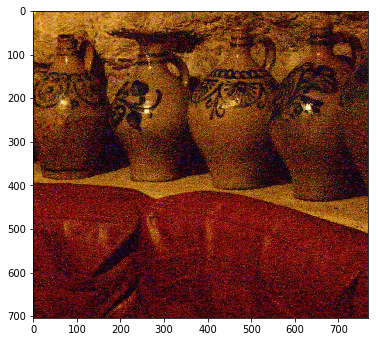

0.00013868166
0.00012639687
0.00012882786
0.00013757397
0.00014254122
0.00013086821
0.00012224237
0.00012697974
0.00013161806
0.00013035556
0.00012266156
0.0001202663
0.00012273103
0.00012497959
0.00012244425
0.000118044634
0.00011765693
0.00011946367
0.00012120584
0.000119461096
0.00011728722
0.00011608345
0.00011427541
0.00011374946
0.00011470271
0.00011509401
0.00011520579
0.00011392173
0.000112472946
0.0001118308
0.00011125359
0.00011001482
0.000109185494
0.00010912009
0.000109214954
0.00010819663
0.0001075113
0.00010771843
0.00010816563
0.00010962979
0.00010915177
0.00010978481
0.00011073654
0.000114841925
0.000121962184
0.00014017712
0.0001463768
0.00014157596
0.00011978964
0.000108243854


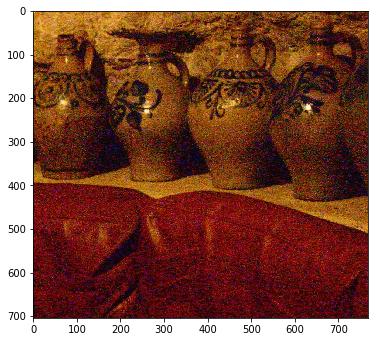

0.000116405434
0.00012295056
0.00011906053
0.00010891411
0.00010897512
0.000117674994
0.00011528217
0.000107244385
0.00010684315
0.00010959898
0.00010772277
0.00010562906
0.0001061256
0.000106216816
0.00010436238
0.00010356841
0.00010434641
0.00010314847
0.0001017874
0.00010159082
0.00010234661
0.00010271227
0.000106423824
0.00010638465
0.00010426734
0.00010727697
0.00010467816
0.00010354656
0.00010475437
0.00010343462
0.00010326367
0.00010166917
0.00010169686
0.000100854595
9.9981e-05
9.926397e-05
9.8778284e-05
9.888431e-05
9.824811e-05
9.884807e-05
9.880286e-05
0.000100444966
0.00010258957
0.00010746185
0.000112592104
0.00012267128
0.00012182104
0.00011318621
0.000103515704
0.00010044684


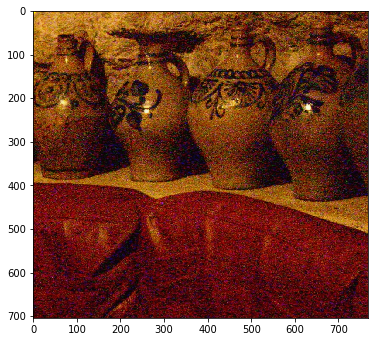

0.00010551364
0.00010709839
0.00010634354
0.00010246791
0.00010010471
9.930326e-05
0.00010098877
0.00010017939
9.8404766e-05
9.6587624e-05
9.717427e-05
9.6284035e-05
9.6135635e-05
9.444102e-05
9.251545e-05
9.340106e-05
9.389169e-05
9.157958e-05
9.109437e-05
9.108101e-05
8.9850284e-05
8.940645e-05
8.954089e-05
8.963006e-05
8.837303e-05
8.8189976e-05
8.843403e-05
8.82762e-05
8.7495006e-05
8.7280096e-05
8.809973e-05
8.901635e-05
8.92958e-05
8.9987996e-05
9.147369e-05
9.360178e-05
9.796539e-05
0.00010313094
0.00010538786
9.8336364e-05
9.314349e-05
8.9456196e-05
9.121739e-05
9.383025e-05
9.341011e-05
9.2212045e-05
9.0733854e-05
9.081788e-05
8.907009e-05
8.783756e-05


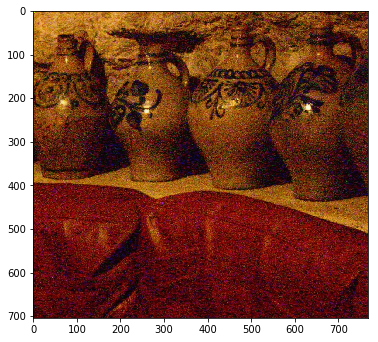

8.861264e-05
8.868973e-05
8.845963e-05
8.597497e-05
8.525665e-05
8.5263084e-05
8.574755e-05
8.462265e-05
8.3405175e-05
8.262953e-05
8.250823e-05
8.2423074e-05
8.2382874e-05
8.219547e-05
8.191362e-05
8.102941e-05
8.179102e-05
8.206416e-05
8.281831e-05
8.3901046e-05
8.259191e-05
8.537162e-05
9.120429e-05
0.00010686261
0.00013111152
0.00017125878
0.00015105258
0.000103981845
9.9986224e-05
0.00012379678
0.000121272686
8.978597e-05
0.00010747279
0.00010783679
9.859084e-05
9.460623e-05
0.00010380188
9.8065015e-05
8.933705e-05
9.530241e-05
9.336495e-05
9.060631e-05
8.734435e-05
8.8744724e-05
8.766837e-05
8.335572e-05
8.455416e-05
8.491519e-05
8.419295e-05
8.088411e-05


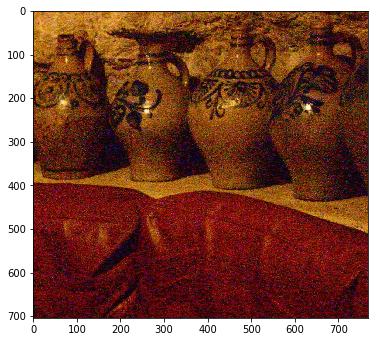

In [18]:
with tf.Session(config=config) as sess:
    sess.run(init_op)   
    feed_dict = {inputs:net_input}
    
    for i in range(num_iter):
        _, loss_val = sess.run([train_op,loss],feed_dict=feed_dict)

        print(loss_val)
        
        if i % plot_iter == 0:
            check_np = sess.run(out,feed_dict=feed_dict)[0]
            
            plt.figure(figsize=(factor, factor))
#             plt.imshow(np.clip(check_np,0,1), cmap='gray', interpolation='lanczos')
            plt.imshow(np.clip(check_np,0,1))
            
            plt.show()

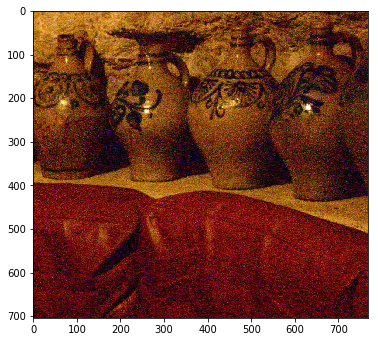

In [20]:
plt.figure(figsize=(factor, factor))
#             plt.imshow(np.clip(check_np,0,1), cmap='gray', interpolation='lanczos')
plt.imshow(np.squeeze(net_input))

plt.show()

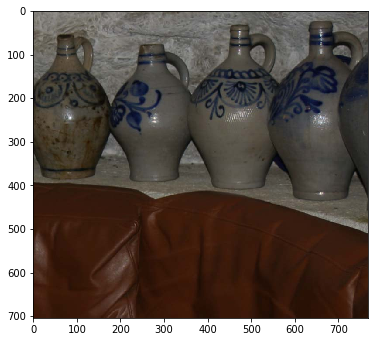

In [21]:
plt.figure(figsize=(factor, factor))
#             plt.imshow(np.clip(check_np,0,1), cmap='gray', interpolation='lanczos')
plt.imshow(img_flash_np.transpose((1,2,0)))

plt.show()